# 📊 Business Analytics: Customer Churn Prediction Assignment

## 🎯 Overview
In this assignment, you will apply logistic regression techniques to predict customer churn in a telecommunications company dataset. You will perform comprehensive data cleaning, preprocessing, exploratory data analysis, and build a binary classification model using logistic regression. This assignment will test your ability to handle real-world business data and extract actionable insights that can help reduce customer attrition.

## 💾 Dataset
For this assignment, you will use the **Telco Customer Churn dataset**, which contains information about customers of a telecommunications company, their demographics, account information, services they have signed up for, and whether they have churned (left the company). The target variable 'Churn' is binary (Yes/No).

## 🧠 Learning Objectives
- Apply advanced data cleaning and preprocessing techniques
- Perform in-depth exploratory data analysis using pandas
- Implement and evaluate logistic regression models for binary classification
- Interpret model results in a business context
- Present findings with appropriate visualizations

---

## 📝 Assignment Tasks and Requirements

### Task 1: Data Acquisition and Exploration *(20 marks)*
> **Focus**: Comprehensive understanding of the dataset structure

- Load the Telco Customer Churn dataset from sklearn or any other relevant source *(2 marks)*
- Display the first and last 10 rows of the dataset *(2 marks)*
- Examine the dataset structure, including data types and detailed summary statistics *(4 marks)*
- Use `df.info()`, `df.describe()`, and `df.dtypes` to get a complete overview *(3 marks)*
- Identify the number of unique values in each categorical column using `df['column'].value_counts()` *(3 marks)*
- Check for missing, null, and duplicate values using pandas methods *(3 marks)*
- Generate a profile report of the dataset showing key statistics and distributions *(3 marks)*

### Task 2: Data Cleaning and Advanced Preprocessing *(25 marks)*
> **Skills**: Data manipulation, transformation, feature engineering

- Handle missing values using appropriate techniques (justify your approach) *(4 marks)*
- Convert categorical variables to numerical format using appropriate encoding methods *(4 marks)*
- Create at least 3 new features from existing data using pandas operations like:
  - Customer tenure groups (e.g., 0-12 months, 13-24 months, etc.)
  - Total services subscribed per customer
  - Average monthly charges per service
  - Customer lifetime value (tenure × monthly charges) *(6 marks)*
- Apply outlier detection and handling using IQR or z-score methods *(4 marks)*
- Standardize or normalize numerical features as needed *(3 marks)*
- Remove irrelevant features that would not contribute to the analysis (justify your choices) *(4 marks)*

### Task 3: Exploratory Data Analysis and Visualization *(20 marks)*
> **Deliverable**: Professional-quality visualizations with clear interpretations

- Create a correlation matrix and visualize it using a heatmap *(3 marks)*
- Perform groupby operations to analyze churn rates across different customer segments *(4 marks)*
- Use pandas pivot tables and crosstabs to explore relationships between categorical variables and churn *(4 marks)*
- Develop at least 3 visualizations showing the relationship between important features and churn:
  - Distribution plots comparing churned vs retained customers
  - Bar charts showing churn rates by categorical features
  - Box plots for numerical features by churn status *(6 marks)*
- Write a detailed interpretation of your visualizations in a business context *(3 marks)*

### Task 4: Logistic Regression Model Implementation *(25 marks)*
> **Focus**: Binary classification with proper validation

- Split the dataset into training and testing sets *(3 marks)*
- Implement logistic regression for binary classification of customer churn *(5 marks)*
- Use k-fold cross-validation to ensure model robustness *(4 marks)*
- Tune the hyperparameters of your logistic regression model *(4 marks)*
- Evaluate the model's performance using appropriate metrics:
  - Accuracy, precision, recall, F1-score
  - ROC curve and AUC score
  - Precision-Recall curve *(5 marks)*
- Generate the confusion matrix and visualize it *(2 marks)*
- Analyze the feature importance based on the model coefficients *(2 marks)*

### Task 5: Business Insights and Recommendations *(10 marks)*
> **Key Deliverable**: Actionable business recommendations

- Based on your analysis, identify the top 5 factors influencing customer churn *(3 marks)*
- Calculate the potential financial impact of reducing churn by 5% *(2 marks)*
- Provide actionable business recommendations derived from your model results *(3 marks)*
- Discuss limitations of your analysis and suggestions for improvement *(2 marks)*

---

## 📋 Submission Guidelines
- Submit a well-documented Jupyter notebook containing all code, visualizations, and explanations
- Include comments throughout your code explaining your approach
- Provide a separate executive summary (maximum 500 words) highlighting key findings and recommendations
- Ensure all visualizations are properly labeled and easy to interpret

## 🏆 Evaluation Criteria
| Criterion | Description | Weight |
|-----------|-------------|--------|
| Pandas Proficiency | Effective use of pandas for data manipulation and analysis | 25% |
| Technical Accuracy | Correctness and completeness of the required tasks | 25% |
| Data Handling | Quality of data preprocessing and feature engineering | 20% |
| Visualization Quality | Appropriateness and clarity of visualizations | 15% |
| Business Insights | Depth and relevance of business recommendations | 15% |

## ⚠️ Important Notes
- You may use any built-in Python libraries such as pandas, numpy, sklearn, matplotlib, and seaborn
- Document any assumptions you make during the analysis
- Focus on explaining your approach and interpreting results in a business context
- Be sure to handle any unexpected issues in the dataset appropriately

**Total marks: 100**

---


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Task 1: Data Acquisition and Exploration (20 marks)¶

### 01: Load the Telco Customer Churn dataset from sklearn or any other relevant source (2 marks)

In [15]:
from sklearn.datasets import fetch_openml
telco_data = fetch_openml(name='telco-customer-churn', version=1)
data = pd.DataFrame(data=telco_data.data, columns=telco_data.feature_names)
data['Churn'] = telco_data.target

### Making Copy of the Dataset

### 02: Display the first and last 10 rows of the dataset (2 marks)

#### First 10 Rows

In [17]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,0,No,No,45,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,'Fiber optic',No,No,Yes,No,Yes,Yes,Month-to-month,Yes,'Electronic check',99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,'Fiber optic',No,Yes,No,No,Yes,No,Month-to-month,Yes,'Credit card (automatic)',89.10,1949.4,No
7,Female,0,No,No,10,No,'No phone service',DSL,Yes,No,No,No,No,No,Month-to-month,No,'Mailed check',29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,'Fiber optic',No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,'Electronic check',104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,'One year',No,'Bank transfer (automatic)',56.15,3487.95,No


#### Last 10 Rows 

In [19]:
data.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,Male,0,No,No,38,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Credit card (automatic)',69.50,2625.25,No
7034,Female,0,No,No,67,Yes,Yes,'Fiber optic',Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,'Credit card (automatic)',102.95,6886.25,Yes
7035,Male,0,No,No,19,Yes,No,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Bank transfer (automatic)',78.70,1495.1,No
7036,Female,0,No,No,12,No,'No phone service',DSL,No,Yes,Yes,Yes,Yes,Yes,'One year',No,'Electronic check',60.65,743.3,No
7037,Female,0,No,No,72,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service','Two year',Yes,'Bank transfer (automatic)',21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,'One year',Yes,'Mailed check',84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,No,Yes,Yes,'One year',Yes,'Credit card (automatic)',103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,'No phone service',DSL,Yes,No,No,No,No,No,Month-to-month,Yes,'Electronic check',29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Mailed check',74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,'Fiber optic',Yes,No,Yes,Yes,Yes,Yes,'Two year',Yes,'Bank transfer (automatic)',105.65,6844.5,No


### 03:Examine the dataset structure, including data types and detailed summary statistics (4 marks)

#### Dataset Structure (Data Types)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Summary Statistics

#### For Numerical Values 

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### For Categorical Values

In [ ]:
data.describe(include = 'O').T

### Descriptive statistics for categorical label explain that, male participants are higher with 3555 numbers. Moreover, fiber optic is highly used internet service. And, majority of the customer around 2365 are on month-to-month basis. One interesting thing, they are technologically literate with majority usge of 'Electronic check'. 

### 04: Use df.info(), df.describe(), and df.dtypes to get a complete overview (3 marks)

#### data.info()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### data.describe()

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### data.dtypes

In [31]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Identify the number of unique values in each categorical column using df['column'].value_counts() (3 marks)

##### Unique values in Gender 

In [33]:
data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

##### Unique values in Partner

In [35]:
data['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

##### Unique values in Dependents

In [119]:
data['Dependents'].value_counts()

Dependents
0    4933
1    2110
Name: count, dtype: int64

##### Unique values in Phoneservice

In [122]:
data['PhoneService'].value_counts()

PhoneService
1    6361
0     682
Name: count, dtype: int64

##### Unique values in MultipleLines 

In [125]:
data['MultipleLines'].value_counts()

MultipleLines
1    3390
2    2971
0     682
Name: count, dtype: int64

##### Unique values in InternetService 

In [128]:
data['InternetService'].value_counts()

InternetService
0    3096
1    2421
2    1526
Name: count, dtype: int64

##### Unique values in OnlineSecurity     


In [131]:
data['OnlineSecurity'].value_counts()

OnlineSecurity
No                       3498
Yes                      2019
'No internet service'    1526
Name: count, dtype: int64

##### Unique values in OnlineBackup        

In [134]:
data['OnlineBackup'].value_counts()

OnlineBackup
No                       3088
Yes                      2429
'No internet service'    1526
Name: count, dtype: int64

##### Unique values in DeviceProtection     


In [137]:
data['DeviceProtection'].value_counts()   

DeviceProtection
No                       3095
Yes                      2422
'No internet service'    1526
Name: count, dtype: int64

##### Unique values in TechSupport      


In [140]:
data['TechSupport'].value_counts()  

TechSupport
No                       3473
Yes                      2044
'No internet service'    1526
Name: count, dtype: int64

##### Unique values in StreamingTV        


In [143]:
data['StreamingTV'].value_counts()  

StreamingTV
No                       2810
Yes                      2707
'No internet service'    1526
Name: count, dtype: int64

##### Unique values in StreamingMovies      


In [146]:
data['StreamingMovies'].value_counts()

StreamingMovies
No                       2785
Yes                      2732
'No internet service'    1526
Name: count, dtype: int64

##### Unique values in Contract             


In [149]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
'Two year'        1695
'One year'        1473
Name: count, dtype: int64

##### Unique values in PaperlessBilling     


In [152]:
data['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

##### Unique values in PaymentMethod        

In [155]:
data['PaymentMethod'].value_counts()

PaymentMethod
'Electronic check'             2365
'Mailed check'                 1612
'Bank transfer (automatic)'    1544
'Credit card (automatic)'      1522
Name: count, dtype: int64

### Check for missing, null, and duplicate values using pandas methods (3 marks)

##### Checking Null values

In [159]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Checking Duplicates Values per feature 

In [162]:
for column in data.columns:
    duplicate_values = data[column].duplicated().sum()
    print(f'Duplicates values in {column} are {duplicate_values}')

Duplicates values in gender are 7041
Duplicates values in SeniorCitizen are 7041
Duplicates values in Partner are 7041
Duplicates values in Dependents are 7041
Duplicates values in tenure are 6970
Duplicates values in PhoneService are 7041
Duplicates values in MultipleLines are 7040
Duplicates values in InternetService are 7040
Duplicates values in OnlineSecurity are 7040
Duplicates values in OnlineBackup are 7040
Duplicates values in DeviceProtection are 7040
Duplicates values in TechSupport are 7040
Duplicates values in StreamingTV are 7040
Duplicates values in StreamingMovies are 7040
Duplicates values in Contract are 7040
Duplicates values in PaperlessBilling are 7041
Duplicates values in PaymentMethod are 7039
Duplicates values in MonthlyCharges are 5458
Duplicates values in TotalCharges are 512
Duplicates values in Churn are 7041


#### Here, almost all features are showing duplicate values. Analytically, it is very critical process to remove dulicate values. Always, it is not mendatory to  remove these values. Let suppose Gender feature, we cannot remove duplicates because, it has commonly three or four identical values. It is mendatory to be repeated in a dataset. 

##### Checking duplicate values overall in dataset

In [79]:
Dublicate_Values = data.duplicated()
print(Dublicate_Values)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


In [1778]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [1779]:
data.describe(include=['O']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,'Fiber optic',3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


### Generate a profile report of the dataset showing key statistics and distributions (3 marks)

### ----- Key Summary Statistics of the Dataset for both Numerical and Categorical Features ----

#### Reseacher took the help from publiclly available blog/article. Link for the article is mentioned below

In [ ]:
https://www.geeksforgeeks.org/pandas-profiling-in-python/

In [ ]:
!pip install numba==0.56.4

In [ ]:
!pip install ydata-profiling

In [85]:
from pandas_profiling import ProfileReport

In [87]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### The descriptive summary of the dataset explain the number of unique values, and most repeatative value in the feature. It's help to understand the distribution of the dataset. In addition, its helps to balance the dataset while training the machine learning model. 


# TASK 2: Data Cleaning and Preprocessing



### 01: Handle missing values using appropriate techniques (justify your approach) (4 marks)

In [1784]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## The researcher has found that, this dataset is clean. Based on observation, there is no missing value in any feature, however there is not an urgency to impute missing values

### 02: Convert categorical variables to numerical format using appropriate encoding methods (4 marks)

#### Researcher adopted two fundamental technique known as one-hot or label encoding for converting categoical features into numbeical. Because machine learning models only learn and understand the patterns from numerical data. Usually, label encoding in applied to binary categorical features or features that have ordered patterns, suppose we have a column Height in some dataset that has elements as Tall, Medium, and short(0,1,2).Alternatively, one-hot encoding is applied. Moreover, there are other encoding techniques like Target Encoding, Mean Value Encoding, Seasonal Encoding, their application is based on use case. 

### Reference Link:

In [1789]:
https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/ 
# Researcher took help from the article (Link mentioned above) while incorporating label encoding for all the features

## Label Encoding 

### Importing dependencies and setting labelencoder

In [94]:
from sklearn import preprocessing
l_encodeing  = preprocessing.LabelEncoder()

#### Checking the unique values in the categorical columns. It helps to better understand and choose the suitable labeling technique. For example for two unique values label encoding is best fit.

### Gender

In [166]:
data['gender']= l_encodeing.fit_transform(data['gender'])

In [168]:
data['gender'].unique()

array([0, 1], dtype=int64)

### Partner

In [171]:
data['Partner']= l_encodeing.fit_transform(data['Partner'])

In [173]:
data['Partner'].unique()

array([1, 0], dtype=int64)

### Dependents

In [176]:
data['Dependents']= l_encodeing.fit_transform(data['Dependents'])

In [178]:
data['Dependents'].unique()

array([0, 1], dtype=int64)

### PhoneService

In [181]:
data['PhoneService']= l_encodeing.fit_transform(data['PhoneService'])

In [183]:
data['PhoneService'].unique()

array([0, 1], dtype=int64)

### MultipleLines

In [186]:
data['MultipleLines']= l_encodeing.fit_transform(data['MultipleLines'])

In [188]:
data['MultipleLines'].unique()

array([0, 1, 2], dtype=int64)

### InternetService

In [191]:
data['InternetService']= l_encodeing.fit_transform(data['InternetService'])

In [193]:
data['InternetService'].unique()

array([1, 0, 2], dtype=int64)

### OnlineSecurity

In [196]:
data['OnlineSecurity']= l_encodeing.fit_transform(data['OnlineSecurity'])

In [198]:
data['OnlineSecurity'].unique()

array([1, 2, 0])

### OnlineBackup

In [201]:
data['OnlineBackup']= l_encodeing.fit_transform(data['OnlineBackup'])

In [203]:
data['OnlineBackup'].unique()

array([2, 1, 0])

### DeviceProtection

In [206]:
data['DeviceProtection']= l_encodeing.fit_transform(data['DeviceProtection'])

In [208]:
data['DeviceProtection'].unique()

array([1, 2, 0])

### TechSupport

In [211]:
data['TechSupport']= l_encodeing.fit_transform(data['TechSupport'])

In [213]:
data['TechSupport'].unique()

array([1, 2, 0])

### StreamingTV

In [216]:
data['StreamingTV']= l_encodeing.fit_transform(data['StreamingTV'])

In [218]:
data['StreamingTV'].unique()

array([1, 2, 0])

### StreamingMovies

In [221]:
data['StreamingMovies']= l_encodeing.fit_transform(data['StreamingMovies'])

In [223]:
data['StreamingMovies'].unique()

array([1, 2, 0])

### PaperlessBilling

In [226]:
data['PaperlessBilling']= l_encodeing.fit_transform(data['PaperlessBilling'])

In [228]:
data['PaperlessBilling'].unique()

array([1, 0])

### Churn 

In [231]:
data['Churn']= l_encodeing.fit_transform(data['Churn'])

In [233]:
data['Churn'].unique()

array([0, 1])

In [235]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,Month-to-month,1,'Electronic check',29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,'One year',0,'Mailed check',56.95,1889.5,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,Month-to-month,1,'Mailed check',53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,'One year',0,'Bank transfer (automatic)',42.30,1840.75,0
4,0,0,0,0,2,1,1,0,1,1,1,1,1,1,Month-to-month,1,'Electronic check',70.70,151.65,1


## One-Hot Encoding (Only Two Features)

### Refrence Link:

In [1839]:
https://www.geeksforgeeks.org/ml-one-hot-encoding/
# Researcher took help from the article (Link mentioned above) while incorporating one_hot encoding for all the features

### Importing dependencies

In [241]:
from sklearn.preprocessing import OneHotEncoder

### PaymentMethod and Contract

In [244]:
categorical_columns = ['PaymentMethod', 'Contract']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data.drop(categorical_columns, axis=1), one_hot_data], axis=1)

In [246]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check',Contract_'One year',Contract_'Two year',Contract_Month-to-month
0,0,0,1,0,1,0,0,1,1,2,...,29.85,29.85,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0,0,0,34,1,1,1,2,1,...,56.95,1889.5,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,0,0,0,2,1,1,1,2,2,...,53.85,108.15,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,1,2,1,...,42.30,1840.75,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,2,1,1,0,1,1,...,70.70,151.65,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1845]:
data.shape

(7043, 25)

### Data Structure before appling One-Hot Encoding 

In [1847]:
## RangeIndex: 7043 entries, 0 to 7042
## Data columns (total 20 columns)

### 03 Create at least 3 new features from existing data using pandas operations like:
#### Customer tenure groups (e.g., 0-12 months, 13-24 months, etc.)
#### Total services subscribed per customer
#### Average monthly charges per service
#### Customer lifetime value (tenure × monthly charges) (6 marks)

# TASK 3: Exploratory Data Analysis and Visualization



### Refrence Link:

### 01: Create a correlation matrix and visualize it using a heatmap (3 marks)

In [256]:
%matplotlib inline

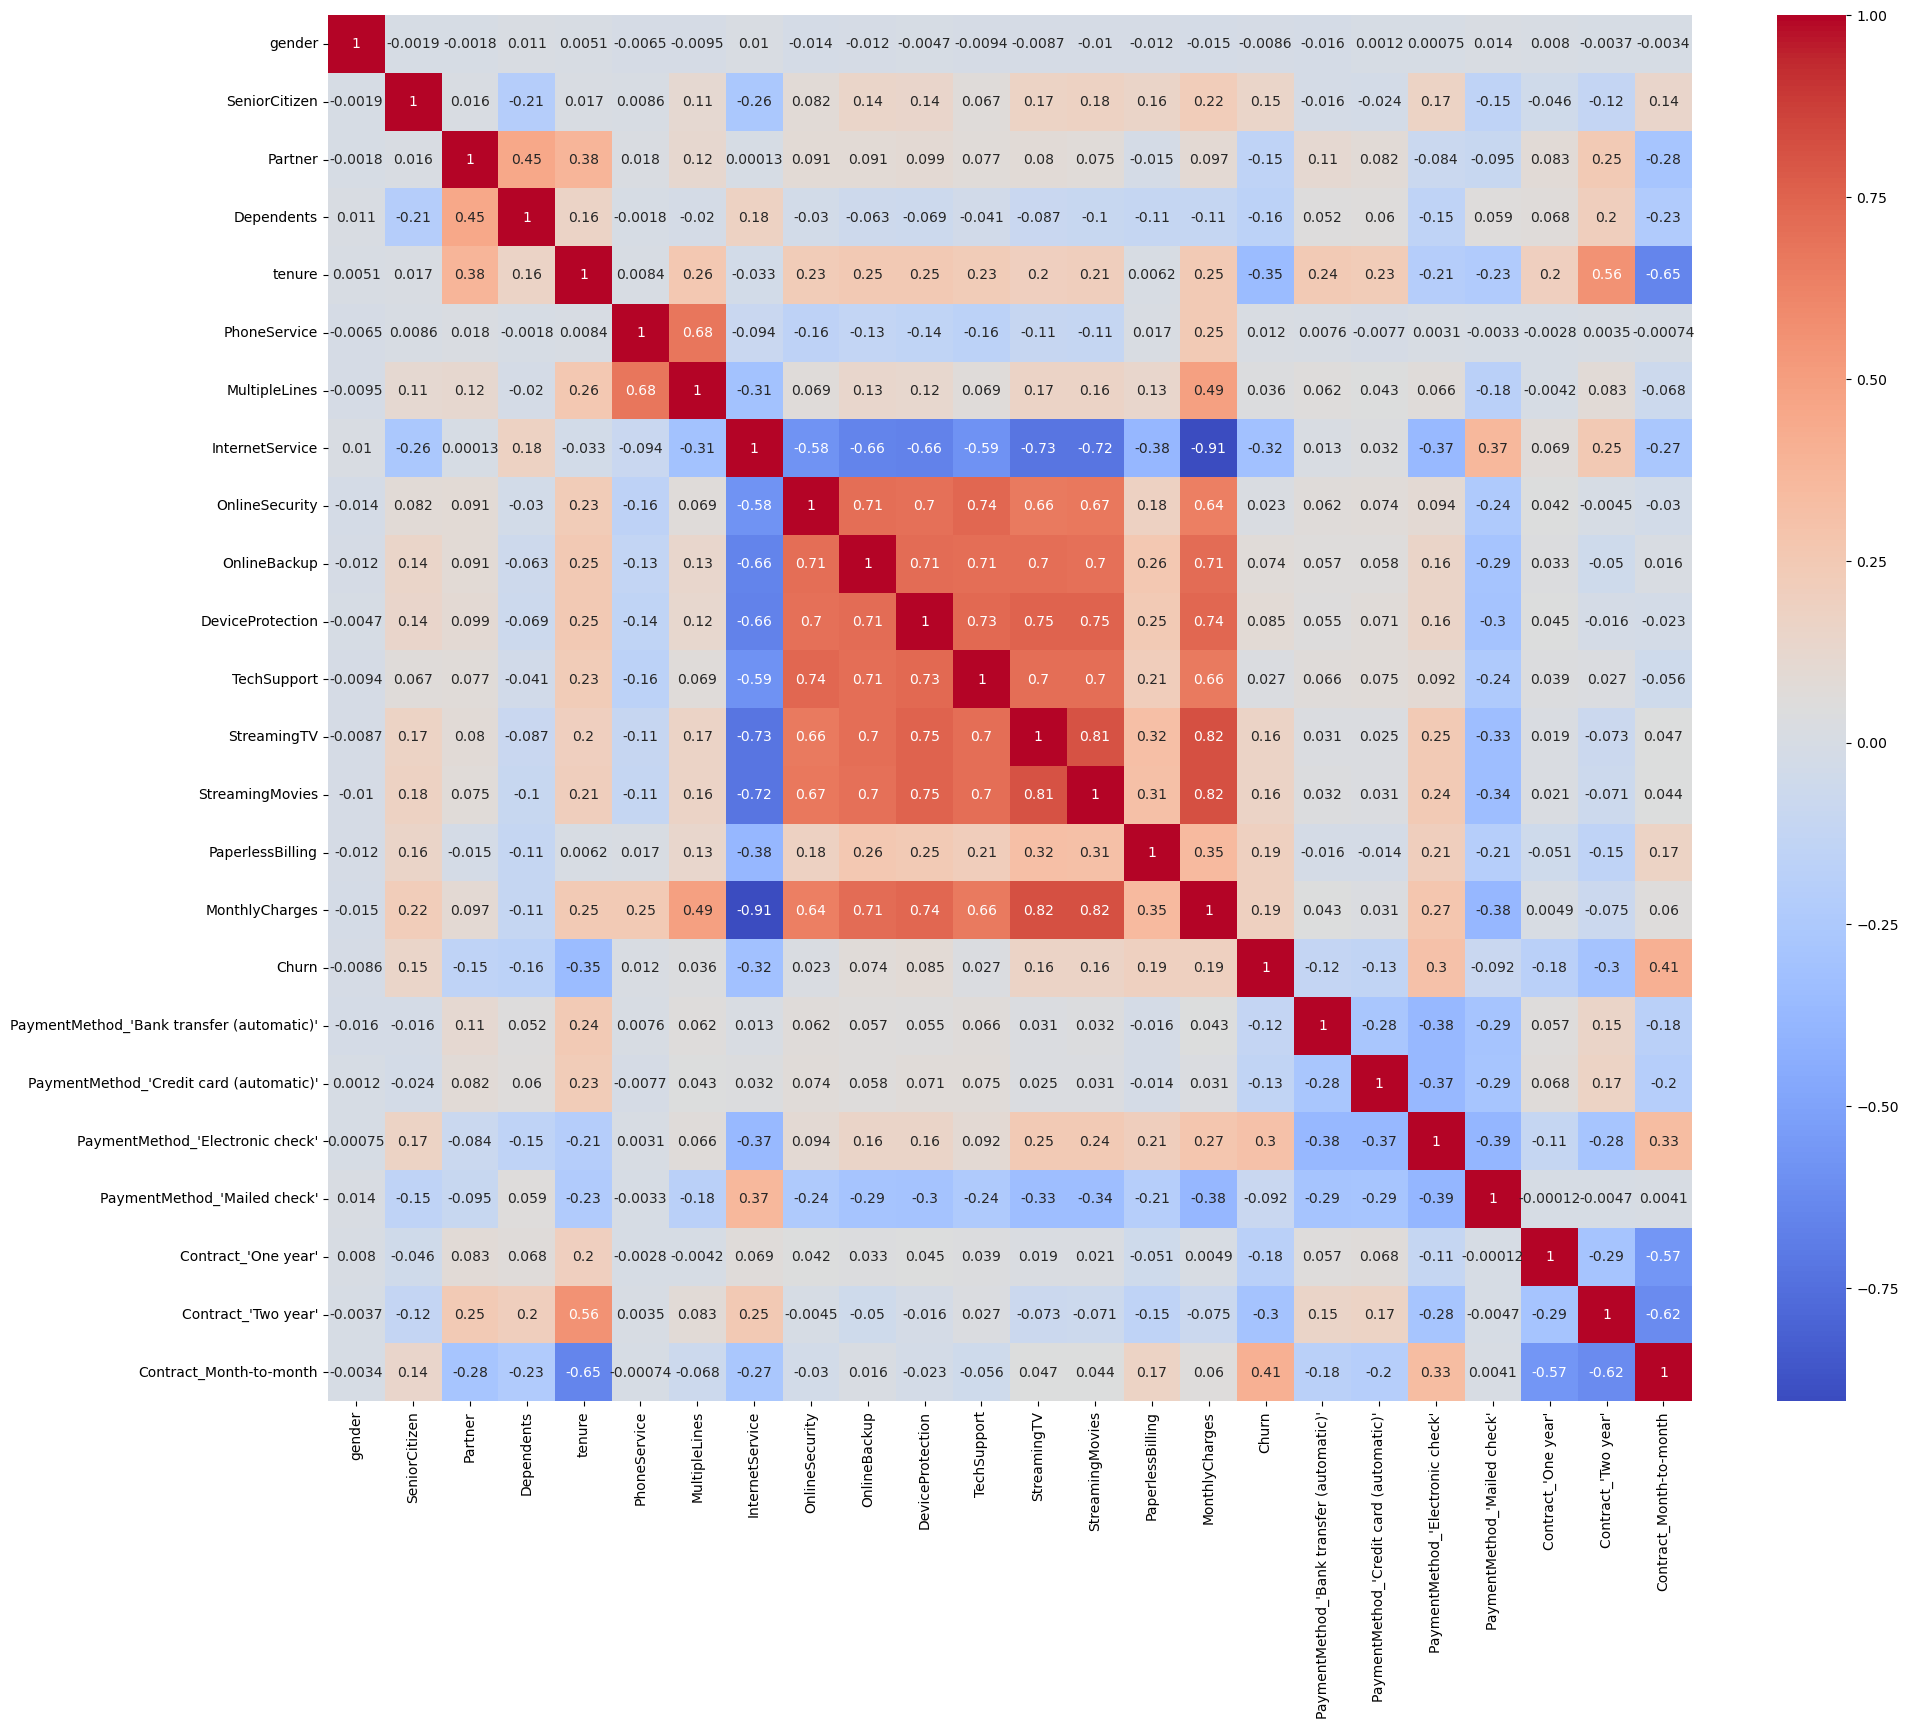

In [260]:
plt.figure(figsize=(22, 18))
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm",annot=True)
plt.show()

### 02: Perform groupby operations to analyze churn rates across different customer segments (4 marks

#### Basically, here researcher is asked to apply groupby to find the percentages of churn rate for different related segments. Like Churn Rate based on 'Contract', Monthly Charges, and Gender etc. 

In [1855]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod_'Bank transfer (automatic)'',
       'PaymentMethod_'Credit card (automatic)'',
       'PaymentMethod_'Electronic check'', 'PaymentMethod_'Mailed check'',
       'Contract_'One year'', 'Contract_'Two year'',
       'Contract_Month-to-month'],
      dtype='object')

#### (A): Churn Rate groupby Gender

In [263]:
data['gender'].unique() # 1 = Male , 0 = Female

array([0, 1], dtype=int64)

In [265]:
churn_rate_by_gender= data.groupby('gender')['Churn'].mean() * 100
churn_rate_by_gender

gender
0    26.920872
1    26.160338
Name: Churn, dtype: float64

#### (B): Churn Rate groupby Partner

In [267]:
data['Partner'].unique() # 1 = Yes , 0 = No

array([1, 0], dtype=int64)

In [269]:
churn_rate_by_Partner = data.groupby('Partner')['Churn'].mean() * 100
churn_rate_by_Partner

Partner
0    32.957979
1    19.664903
Name: Churn, dtype: float64

#### (C): Churn Rate groupby OnlineSecurity

In [273]:
data['OnlineSecurity'].unique() # 1 = Yes , 0 = No

array([1, 2, 0])

In [275]:
churn_rate_by_onlinesec = data.groupby('OnlineSecurity')['Churn'].mean() * 100
churn_rate_by_onlinesec

OnlineSecurity
0     7.404980
1    41.766724
2    14.611194
Name: Churn, dtype: float64

#### (D): Churn Rate groupby DeviceProtection

In [279]:
data['DeviceProtection'].unique() # 1 = Yes , 0 = No , No internet service = 2

array([1, 2, 0])

In [281]:
churn_rate_by_deviceprotection = data.groupby('DeviceProtection')['Churn'].mean() * 100
churn_rate_by_deviceprotection

DeviceProtection
0     7.404980
1    39.127625
2    22.502064
Name: Churn, dtype: float64

### 03: Use pandas pivot tables and crosstabs to explore relationships between categorical variables and churn (4 marks)

In [283]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod_'Bank transfer (automatic)'',
       'PaymentMethod_'Credit card (automatic)'',
       'PaymentMethod_'Electronic check'', 'PaymentMethod_'Mailed check'',
       'Contract_'One year'', 'Contract_'Two year'',
       'Contract_Month-to-month'],
      dtype='object')

### For Gender 

In [287]:
crosstab = pd.crosstab(data['gender'], data['Churn'])
print("Crosstab:\n", crosstab)

Crosstab:
 Churn      0    1
gender           
0       2549  939
1       2625  930


In [289]:
pivot_table = pd.pivot_table(data, index='gender', columns='Churn', aggfunc='size', fill_value=0)
print("\nPivot Table:\n", pivot_table)


Pivot Table:
 Churn      0    1
gender           
0       2549  939
1       2625  930


### For Partner

In [291]:
crosstab = pd.crosstab(data['Partner'], data['Churn'])
print("Crosstab:\n", crosstab)

Crosstab:
 Churn       0     1
Partner            
0        2441  1200
1        2733   669


In [293]:
pivot_table = pd.pivot_table(data, index='Partner', columns='Churn', aggfunc='size', fill_value=0)
print("\nPivot Table:\n", pivot_table)


Pivot Table:
 Churn       0     1
Partner            
0        2441  1200
1        2733   669


### For PhoneService 

In [295]:
crosstab = pd.crosstab(data['PhoneService'], data['Churn'])
print("Crosstab:\n", crosstab)

Crosstab:
 Churn            0     1
PhoneService            
0              512   170
1             4662  1699


In [297]:
pivot_table = pd.pivot_table(data, index='PhoneService', columns='Churn', aggfunc='size', fill_value=0)
print("\nPivot Table:\n", pivot_table)


Pivot Table:
 Churn            0     1
PhoneService            
0              512   170
1             4662  1699


### 04: Develop at least 3 visualizations showing the relationship between important features and churn

### Distribution plots comparing churned vs retained customers

In [303]:
churn_counts = data['Churn'].value_counts()
print(churn_counts)

Churn
0    5174
1    1869
Name: count, dtype: int64


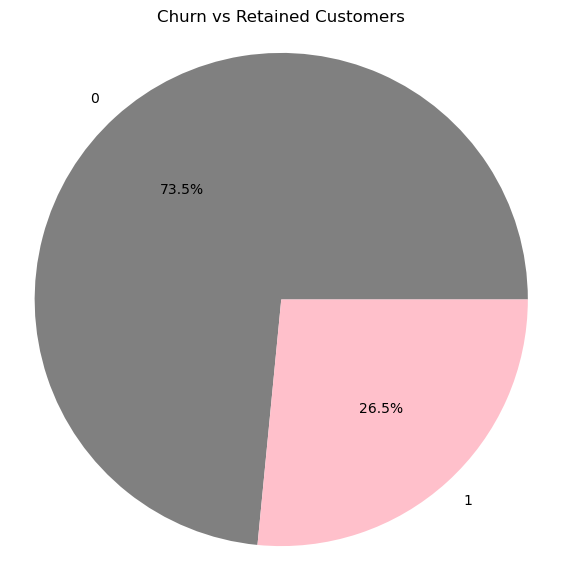

In [305]:
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',colors=['gray','pink']) 
plt.title('Churn vs Retained Customers')
plt.axis('equal')  
plt.show()

### Explaination: 
##### Pie Chart is drawn to show the distribution of the churn feature. It is stated that, nearly 26.5 percent customers have left, otherwise 73.5% retained. Majority of the customer remain loyel with company. 

### Bar charts showing churn rates by categorical features

### Percentage Churn Rate by Gender

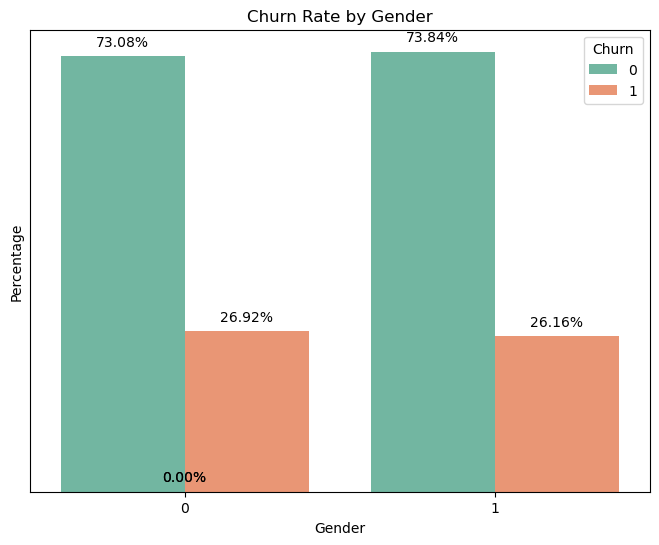

In [339]:
grouped = data.groupby(['gender', 'Churn']).size().reset_index(name='count')
grouped['percentage'] = grouped.groupby('gender')['count'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped, x='gender', y='percentage', hue='Churn', palette='Set2')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
ax.set_yticks([])
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(f'{height:.2f}%', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),           
                textcoords='offset points',
                ha='center', va='bottom') 

plt.show()

### Explaination:
#### Almost equal counts of gender are observed in the case study. There is a minimal point difference in churn rates. So, it is concluded that churn and not-churn cannot be decided based on gender in this specific use case.


### Percentage of Churn Rate by Partner

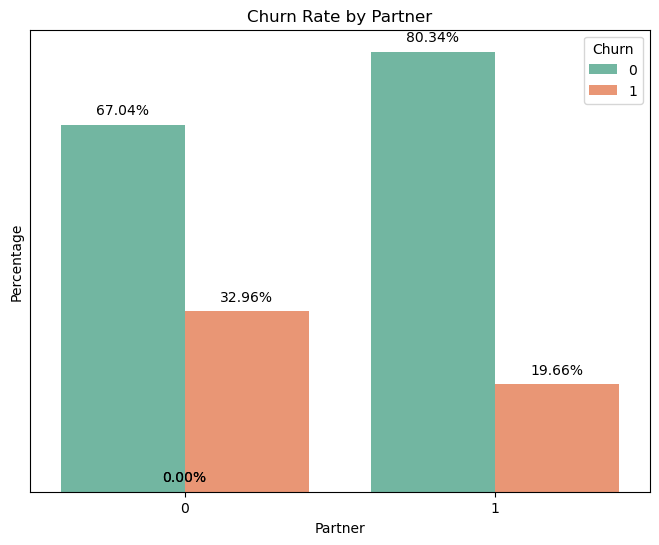

In [342]:
grouped = data.groupby(['Partner', 'Churn']).size().reset_index(name='count')
grouped['percentage'] = grouped.groupby('Partner')['count'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped, x='Partner', y='percentage', hue='Churn', palette='Set2')
plt.title('Churn Rate by Partner')
plt.xlabel('Partner')
plt.ylabel('Percentage')
ax.set_yticks([])
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(f'{height:.2f}%', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),           
                textcoords='offset points',
                ha='center', va='bottom') 

plt.show()

In [346]:
churn_counts = data['gender'].value_counts()
print(churn_counts)

gender
1    3555
0    3488
Name: count, dtype: int64


### Explaination:
#### This visual shows that male partners with 80.34% are leaving services as compared to female partners at 67.04%. Although the female ratio is also high, it could be due to a variety of reasons, such as the number of male customers being higher than female, and also, male customers are older than female.

### Percentage of Churn by StreamingTV

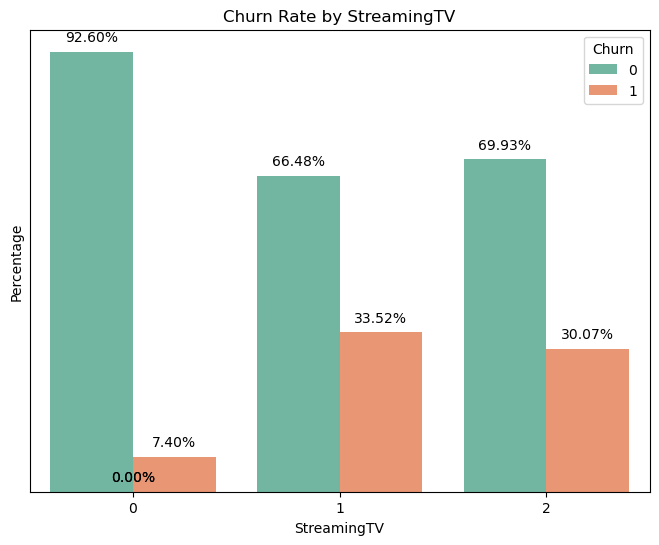

In [350]:
grouped = data.groupby(['StreamingTV', 'Churn']).size().reset_index(name='count')
grouped['percentage'] = grouped.groupby('StreamingTV')['count'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=grouped, x='StreamingTV', y='percentage', hue='Churn', palette='Set2')
plt.title('Churn Rate by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Percentage')
ax.set_yticks([])
for p in ax.patches:
    height = p.get_height()  
    ax.annotate(f'{height:.2f}%', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),           
                textcoords='offset points',
                ha='center', va='bottom') 

plt.show()

### Explaination: 
#### There are mixed trends in StreamingTV. Nearly 7.40% of customers who do not avail the StreamingTV service decided to leave. In addition, 33.53% and 30.07% of customers decided to leave among those who take the streaming services and those who do not have internet service at all, respectively. So, it is concluded that there is a weak impact of StreamingTV on customer attrition. There could be other factors examined in later stages.

### Box plots for numerical features by churn status (6 marks)

In [316]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod_'Bank transfer (automatic)'',
       'PaymentMethod_'Credit card (automatic)'',
       'PaymentMethod_'Electronic check'', 'PaymentMethod_'Mailed check'',
       'Contract_'One year'', 'Contract_'Two year'',
       'Contract_Month-to-month'],
      dtype='object')

### By Senior Citizens 

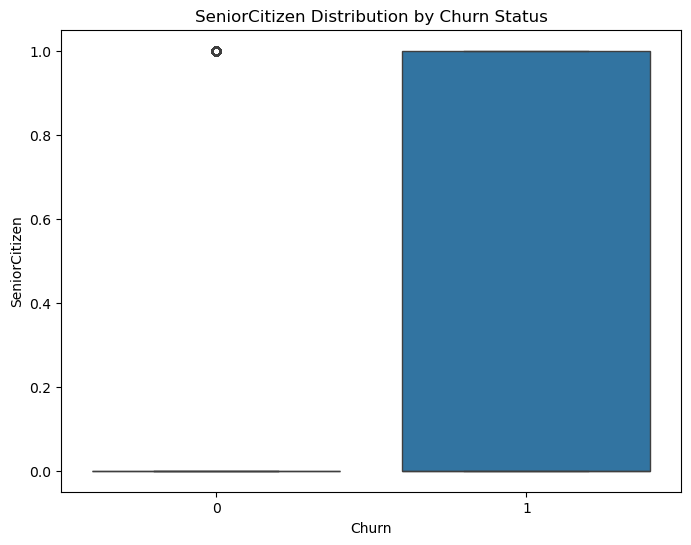

In [363]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='SeniorCitizen', data=data)
plt.title('SeniorCitizen Distribution by Churn Status')
plt.show()

### Explaination:
#### This visual indicates that the majority of senior citizens fall into the churn group, while only a few do not churn. Therefore, we can conclude that customers of higher age (senior citizens) are more likely to churn compared to non-senior citizens. Hence, age can be considered a contributing factor to the churn rate.

### By Tenure 

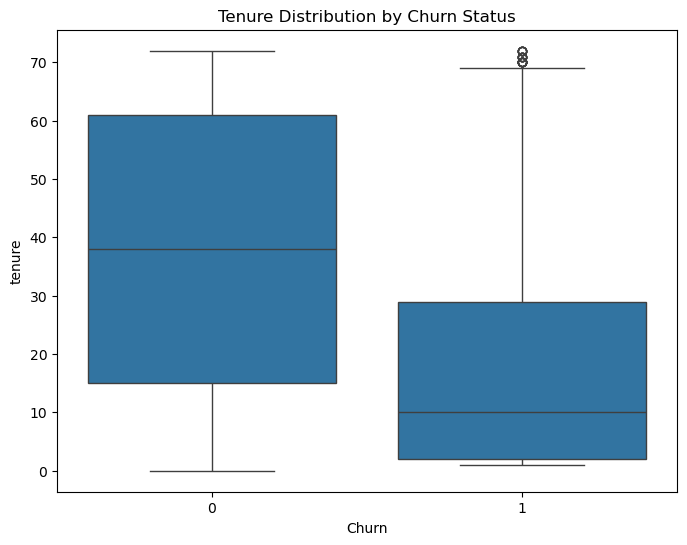

In [320]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure Distribution by Churn Status')
plt.show()

### Explaination:
#### It aligns with the common understanding that non-churning customers are less likely to leave. Therefore, customers with a higher tenure tend to remain loyal to the company. It can be concluded that long-term engagement reduces the churn rate. Conversely, customers often leave early if they find a better option.

### By Monthly Charges 

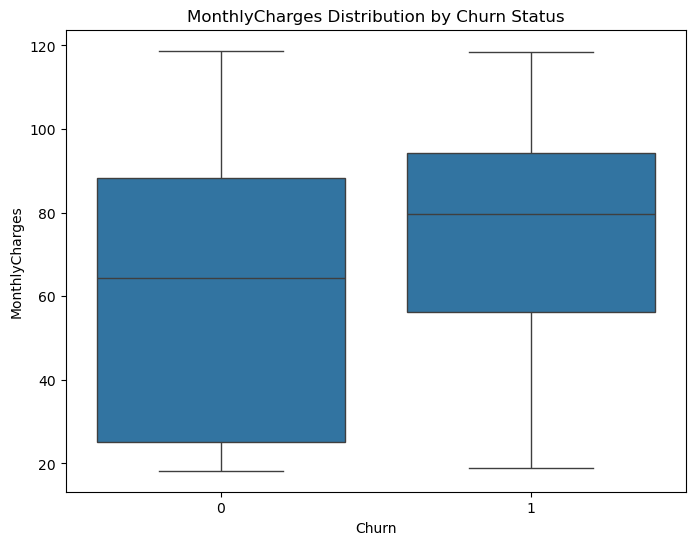

In [322]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('MonthlyCharges Distribution by Churn Status')
plt.show()

### Explaination:
#### Customers who pay higher monthly charges are more likely to churn. In comparison, customers in the non-churn group generally pay lower monthly charges on average. It is concluded that higher monthly charges may prone to churn, possibly due to customers perceiving the services as too expensive or of lower quality.

### 05: Write a detailed interpretation of your visualizations in a business context (3 marks)

### --------------- Detailed explaination is given with each visual, so please consider it----------------

# TASK 4: Logistic Regression Model Implementation



### 01: Split the dataset into training and testing sets (3 marks)

In [509]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'Churn',
       'PaymentMethod_'Bank transfer (automatic)'',
       'PaymentMethod_'Credit card (automatic)'',
       'PaymentMethod_'Electronic check'', 'PaymentMethod_'Mailed check'',
       'Contract_'One year'', 'Contract_'Two year'',
       'Contract_Month-to-month'],
      dtype='object')

In [511]:
from sklearn.model_selection import train_test_split

In [513]:
x = data.drop('Churn', axis=1)  
y = data['Churn']  

In [515]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [517]:
X_train.shape

(5634, 23)

In [519]:
X_test.shape

(1409, 23)

In [521]:
y_train.shape

(5634,)

In [523]:
y_test.shape

(1409,)

###  02: Implement logistic regression for binary classification of customer churn (5 marks)

In [678]:
model = LogisticRegression(max_iter=2000,penalty='elasticnet',solver='saga',l1_ratio=0.5)

In [680]:
model.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=2000, penalty='elasticnet',
                   solver='saga')

In [682]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


### 03: Use k-fold cross-validation to ensure model robustness (4 marks)

In [684]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
cv_scores = cross_val_score(model, X_scaled, y, cv=5)  
print("Cross-validation scores for each fold:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")

Cross-validation scores for each fold: [0.80340667 0.8133428  0.7828247  0.80681818 0.79971591]
Mean cross-validation score: 0.8012
Standard deviation of cross-validation scores: 0.0102


##### The cross-validation scores represent the model’s performance on different subsets of data. Each score shows how well the model performed on a specific fold. The average score of 0.8041 indicates that, on average, the model accurately predicts around 80% of the data. The low standard deviation (0.0081) suggests consistent performance across folds.

### 04: Tune the hyperparameters of your logistic regression model (4 marks)

#### Researcher has decided to use RandomizedSearchCV for hyperparameter tuning. It will further enhance the model performance

In [686]:
from sklearn.model_selection import RandomizedSearchCV

In [689]:

param_dist = {
    'C': np.logspace(-3, 3, 10),
    'max_iter': [2000, 2500, 3000, 3500, 4000]
}

random_search = RandomizedSearchCV(
    model,
    param_dist,
    n_iter=50,
    cv=10,
    n_jobs=-1,
    verbose=5,
    random_state=42
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = LogisticRegression(**best_params)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters: {'max_iter': 2000, 'C': 0.46415888336127775}


### Fit the Model

In [691]:
best_model.fit(X_train, y_train)

LogisticRegression(C=0.46415888336127775, max_iter=2000)

###  (Second Time) Prediction after hyperparameter tuning 

In [693]:
y_pred = best_model.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


### (Second Time) Rerunnig K-fold cross-validation to check model robustness 

In [695]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
cv_scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores for each fold:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")

Cross-validation scores for each fold: [0.80340667 0.8133428  0.7828247  0.80681818 0.79971591]
Mean cross-validation score: 0.8012
Standard deviation of cross-validation scores: 0.0102


####  Model predictions improved slightly but not at large scale

### 04: Evaluate the model's performance using appropriate metrics

In [698]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score

#### Accuracy, precision, recall, F1-score

In [700]:
accuracy = accuracy_score(y_test, y_pred)

In [642]:
precision = precision_score(y_test, y_pred)

In [702]:
recall = recall_score(y_test, y_pred)

In [704]:
f1 = f1_score(y_test, y_pred)

In [706]:
print(f"Accuracy : {accuracy :.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy : 0.8211
Precision: 0.6909
Recall: 0.5871
F1-Score: 0.6348


#### ROC curve and AUC score

In [710]:
y_prob = best_model.predict_proba(X_test)[:, 1] 
y_prob

array([0.61775735, 0.09339742, 0.00927141, ..., 0.05419494, 0.02250505,
       0.43440599])

In [712]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

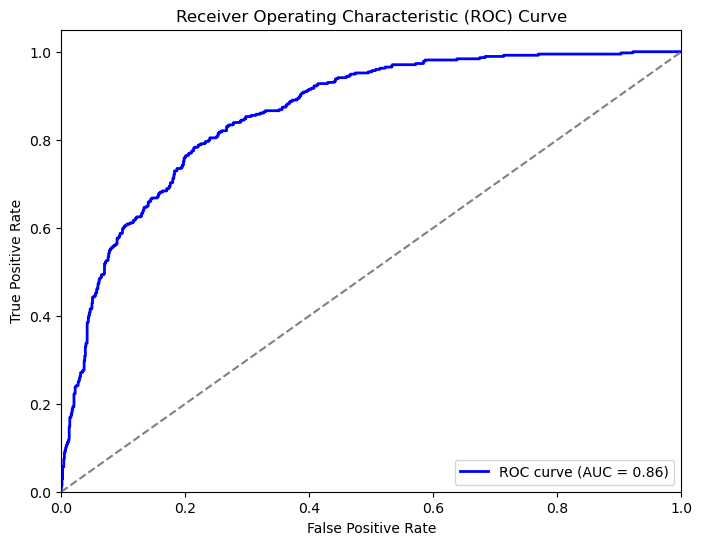

In [714]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall curve (5 marks)

In [716]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
print(f"Average Precision: {average_precision:.4f}")

Average Precision: 0.6777


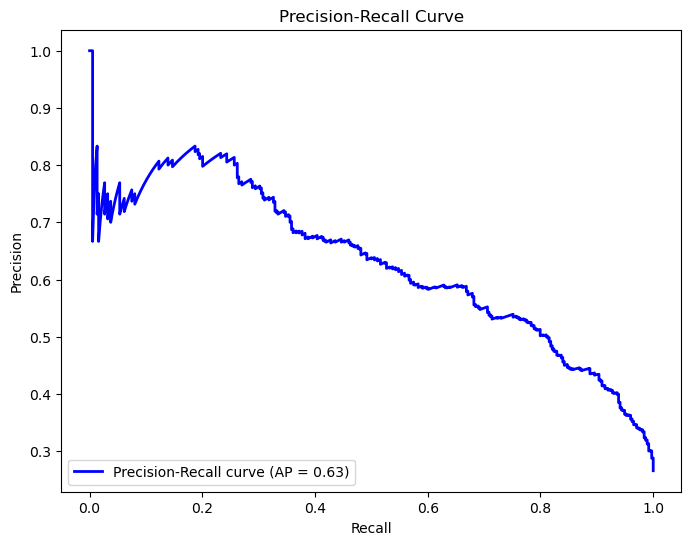

In [2073]:
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


### 06: Generate the confusion matrix and visualize it (2 marks)

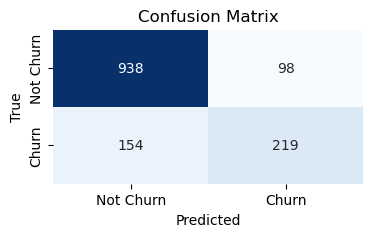

In [718]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Analyze the feature importance based on the model coefficients (2 marks)

                                      Feature  Coefficient
7                             InternetService    -0.999707
22                    Contract_Month-to-month     0.747314
5                                PhoneService    -0.651861
21                        Contract_'Two year'    -0.629593
13                            StreamingMovies     0.398381
8                              OnlineSecurity    -0.377618
14                           PaperlessBilling     0.334876
18           PaymentMethod_'Electronic check'     0.318936
6                               MultipleLines     0.299188
11                                TechSupport    -0.296087
12                                StreamingTV     0.293518
3                                  Dependents    -0.173477
1                               SeniorCitizen     0.167389
9                                OnlineBackup    -0.105542
17    PaymentMethod_'Credit card (automatic)'    -0.095082
20                        Contract_'One year'     0.0937

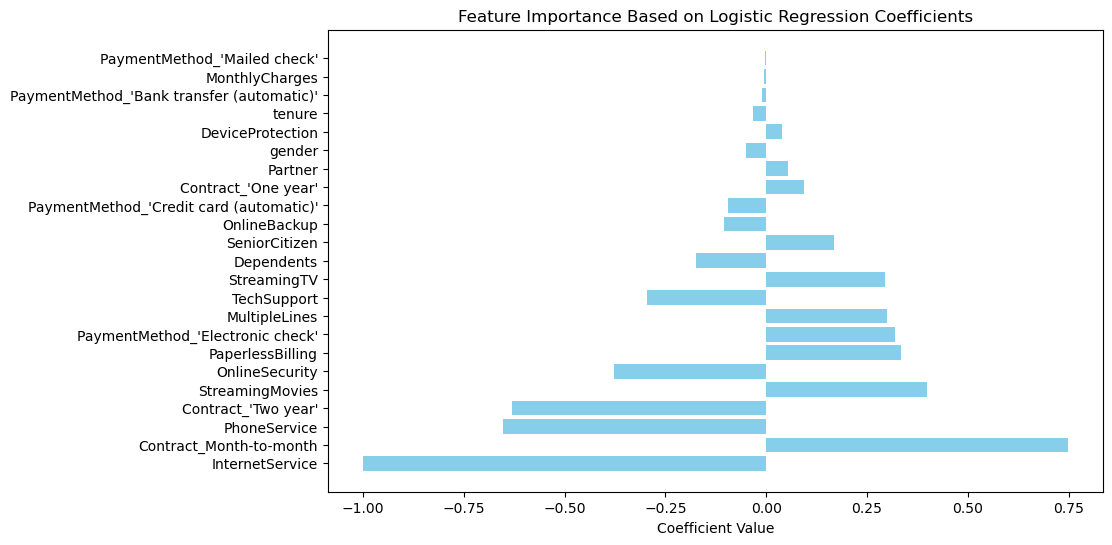

In [722]:
coefficients = best_model.coef_[0]  
feature_importance = pd.DataFrame({
    'Feature':x.columns,
    'Coefficient': coefficients
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].apply(np.abs)
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
print(feature_importance[['Feature', 'Coefficient']])
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.show()

# TASK 5: Business Insights and Recommendations

### 01: Based on your analysis, identify the top 5 factors influencing customer churn (3 marks)

#### 01 InternetService: Strong negative influence (-0.936), indicating that customers without internet service are more likely to churn.It is definate that, customer retension is based on services provided to them. Alternatively, they prefer to move for alternative better options. This could be interprated other way that, if it has positive relation it could be decideing factor.  

#### 02 Contract_Month-to-month: Positive influence (0.657), suggesting customers on month-to-month contracts are more likely to leave.
#### 03 Contract_'Two year': Negative influence (-0.547), indicating customers on two-year contracts are less likely to churn.
#### 04 PhoneService: Negative influence (-0.545), showing that customers with phone service are less likely to churn.
#### 05 OnlineSecurity: Negative influence (-0.355), meaning customers with online security are less likely to churn.

### 02: Calculate the potential financial impact of reducing churn by 5% (2 marks)

#### By reducing churn by 5% will bring the following potential improvement and add into overall perfromance

##### Lower Acquisition Costs: Retaining customers reduces the need for costly marketing and sales to replace lost customers.
##### Stable Revenue: Fewer customers leaving ensures more consistent and predictable revenue.
##### Higher Customer Lifetime Value (CLV): Reduced churn increases the average revenue per customer over time.
##### Upselling Opportunities: More retained customers provide additional opportunities for upselling and cross-selling.
##### Long-Term Growth: Retaining customers supports long-term business growth by maintaining a loyal customer base.

### 03: Provide actionable business recommendations derived from your model results (3 marks)

### 04: Discuss limitations of your analysis and suggestions for improvement (2 marks)